#**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

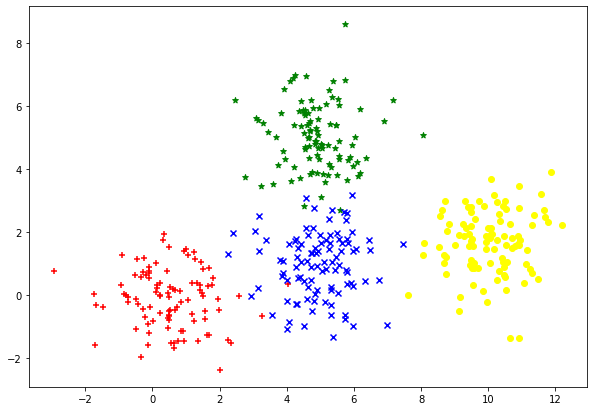

In [6]:
# write your code here
K = 4

data = []
means = [(0.5, 0), (5, 5), (5, 1), (10, 1.5)]
color_style = [('red', '+'), ('green', '*'), ('blue', 'x'), ('yellow', 'o')]

plt.figure(figsize=(10, 7))

for i in range(K):
    d = np.random.multivariate_normal(mean=means[i], cov=np.identity(2), size=100)
    plt.scatter(d[:, 0], d[:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])
    data.append(d)

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

Mean Vectors: [[ 3.88437096  0.71513488]
 [ 9.49458341  2.80679282]
 [-0.21561613 -0.69236286]
 [ 3.57106849 -0.6144957 ]]
[[ 3.88437096e+00  7.15134881e-01]
 [ 9.49458341e+00  2.80679282e+00]
 [-2.15616135e-01 -6.92362859e-01]
 [ 3.57106849e+00 -6.14495698e-01]
 [ 1.25352291e+00  1.14715659e+00]
 [ 4.90859200e+00  1.67479024e-01]
 [ 5.74068422e+00 -6.41573703e-01]
 [ 1.03562559e+01  2.33648115e+00]
 [ 2.45624968e+00  6.17659120e+00]
 [ 4.89074724e-01 -6.30094910e-01]
 [-4.60070705e-01  1.13885148e+00]
 [ 5.91296734e+00  4.02816247e-01]
 [ 9.15701989e+00 -5.58429104e-02]
 [ 1.69699980e+00  8.58323301e-01]
 [ 6.45777019e+00  1.73465961e+00]
 [ 4.67045411e+00  4.99615939e+00]
 [ 4.54343908e+00  4.64634850e+00]
 [ 3.22496682e+00  3.45012245e+00]
 [ 5.72430546e+00  8.60272814e+00]
 [ 1.05552928e+00  1.27396036e+00]
 [ 3.91363006e+00  6.51982474e+00]
 [ 9.92477129e+00  1.45218375e+00]
 [ 4.63332563e-01 -7.28975057e-01]
 [ 4.67443545e+00  4.33641653e+00]
 [ 3.04114318e+00  2.03150612e+00]
 [

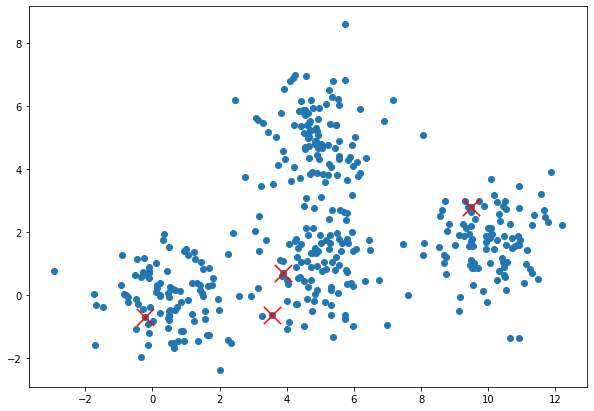

In [7]:
data_points = np.concatenate(data, axis=0)
np.random.shuffle(data_points)


plt.figure(figsize=(10, 7))

mean_vectors = data_points[:K, :]

print("Mean Vectors:", mean_vectors)
print(data_points)


plt.scatter(data_points[:, 0], data_points[:, 1])
plt.scatter(mean_vectors[:, 0], mean_vectors[:, 1], color='red', marker='x', s=300)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

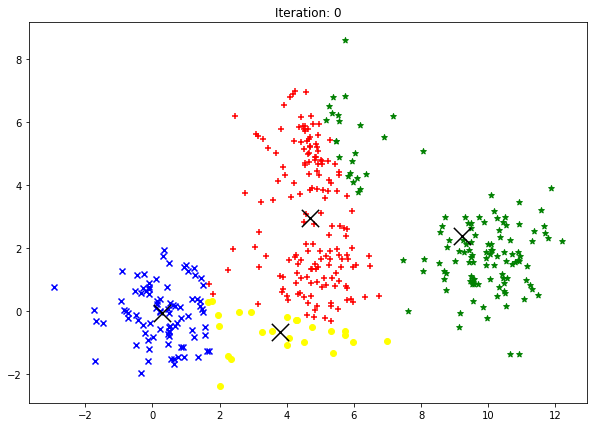

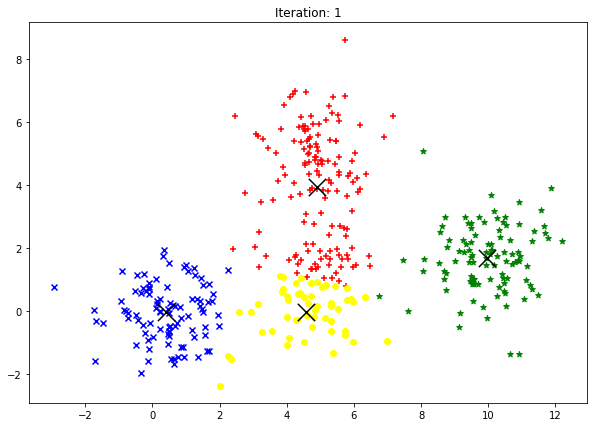

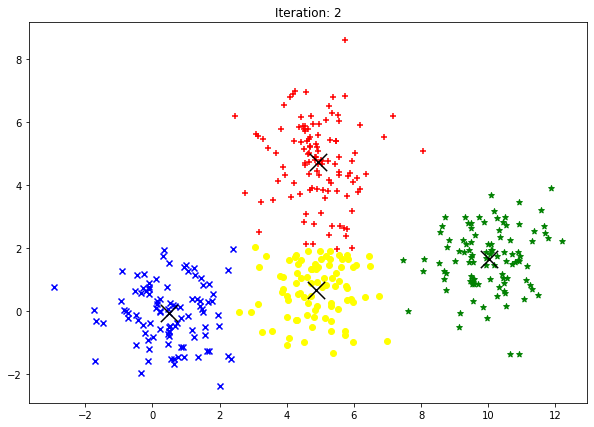

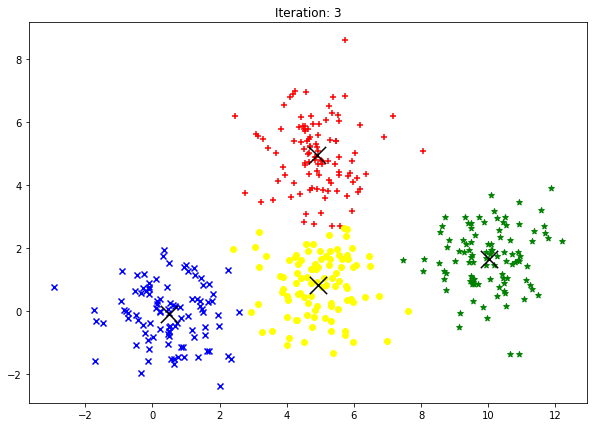

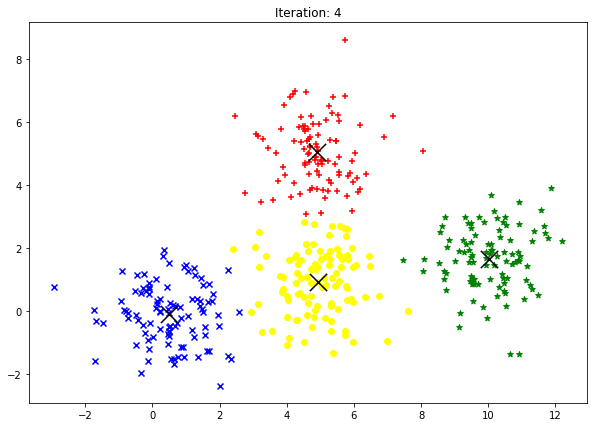

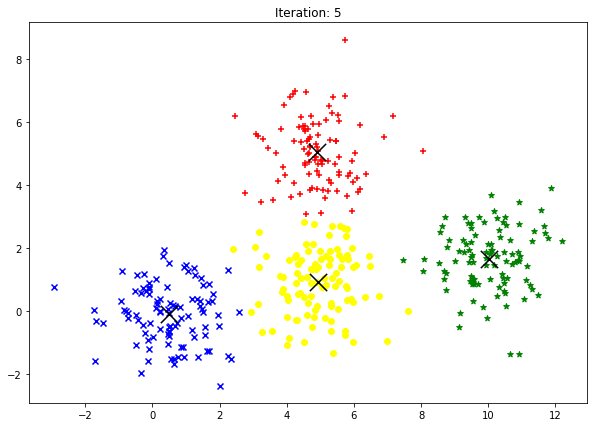

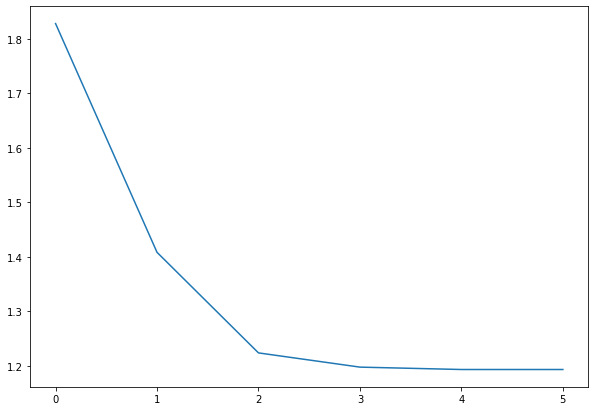

In [8]:
tol = 1e-5

delta = float('inf')
prev_error = float('inf')

errors = []
iter = 0

while delta>tol:
    assigned = [[] for i in range(K)]
    for i in range(data_points.shape[0]):
        min_index = np.argmin(np.linalg.norm(data_points[i] - mean_vectors, axis=1))
        assigned[min_index].append(i)
        
    assigned_clusters = []
    for i in range(K): assigned_clusters.append(data_points[assigned[i]])

    mean_vectors = np.array([cluster.mean(axis=0) for cluster in assigned_clusters])

    plt.figure(figsize=(10, 7))

    for i in range(K):
        plt.scatter(assigned_clusters[i][:, 0], assigned_clusters[i][:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])

    plt.scatter(mean_vectors[:, 0], mean_vectors[:, 1], color='black', marker='x', s=300)
    plt.title(f'Iteration: {iter}')
    
    sum_error = 0

    for i in range(K): sum_error += np.sum(np.linalg.norm(assigned_clusters[i]-mean_vectors[i], axis=1))

    sum_error
    delta = abs(prev_error - sum_error/data_points.shape[0])
    prev_error = sum_error/data_points.shape[0]

    prev_error
    errors.append(prev_error)
    iter+=1

plt.figure(figsize=(10, 7))
plt.plot(range(len(errors)), errors)
    

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [9]:
from sklearn.metrics.cluster import homogeneity_score, silhouette_score

# Homogeneity Score
labels_true = []
labels_predicted = []

for i in range(K):
    for j in range(len(data[i])):
        labels_true.append(i)
        index = np.argmin(np.linalg.norm(data[i][j] - mean_vectors, axis=1))
        labels_predicted.append(index)

h_score = homogeneity_score(labels_true, labels_predicted)

print(f'Homogeneity score for the classification is: {h_score}')

# Silhouette coefficient
all_points = np.concatenate(assigned_clusters, axis=0)
N = len(all_points)

pairwise = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        pairwise[i][j] = np.linalg.norm(np.subtract(all_points[i], all_points[j]))

labels=[]
for id, cluster in enumerate(assigned_clusters):
    labels += [id for i in range(len(cluster))]

sc_score = silhouette_score(pairwise, labels)
print(f'Silhouette coefficient for the classification is: {sc_score}')

Homogeneity score for the classification is: 0.9167361647536697
Silhouette coefficient for the classification is: 0.6035170165031677


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

(400, 2)

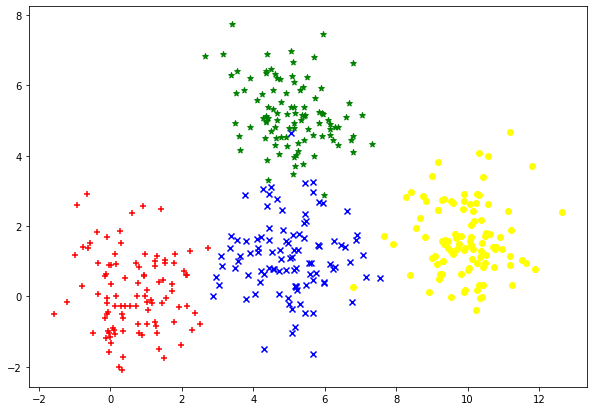

In [10]:
# write your code here
K = 4

data_sep = []
means = [(0.5, 0), (5, 5), (5, 1), (10, 1.5)]
color_style = [('red', '+'), ('green', '*'), ('blue', 'x'), ('yellow', 'o')]

plt.figure(figsize=(10, 7))

for i in range(K):
    d = np.random.multivariate_normal(mean=means[i], cov=np.identity(2), size=100)
    plt.scatter(d[:, 0], d[:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])
    data_sep.append(d)

data = np.concatenate(data_sep, axis=0)
data.shape

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [11]:
def initialization(data,K):

  dim = data.shape[1]
  indices = np.random.randint(0, len(data)-1, K)
  mean_vectors = data[indices, :]
  cov_matrix = np.zeros((dim, dim, K))
  for k in range(K):
    cov_matrix[:, :, k] = np.identity(dim)*np.max(data)
  w = np.array([1/K for i in range(K)])

  theta = [mean_vectors, cov_matrix, w]
  
  return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [12]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    mean_vectors = theta[0]
    cov_matrix = theta[1]
    w = theta[2]
    
    responsibility = np.zeros((len(data), K))
    for i in range(len(data)):
        for k in range(K):
            p_ik = multivariate_normal.pdf(data[i], mean=mean_vectors[k], cov=cov_matrix[:, :, k])
            numerator_ik = w[k] * p_ik

            denominator_ik = 0
            
            for k2 in range(K):
                p_ik_temp = multivariate_normal.pdf(data[i], mean=mean_vectors[k2], cov=cov_matrix[:, :, k2])
                numerator_ik_temp = w[k2] * p_ik_temp
                denominator_ik += numerator_ik_temp
            
            responsibility[i][k] = numerator_ik/denominator_ik

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [13]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    N = len(data)
    dim = data.shape[1]
    K = responsibility.shape[1]
    
    N_k = np.sum(responsibility, axis=0)
    N_k = np.reshape(N_k, (4, 1))
    w = N_k/N
    
    num_k = np.transpose(responsibility) @ data
    mean_vectors = np.divide(num_k, N_k)
    
    cov_matrix = np.zeros((dim, dim, K))
    for k in range(K):
        for i in range(N):
            diff = np.reshape((data[i]-mean_vectors[k]), (2, 1))
            cov_matrix[:, :, k] += responsibility[i][k] * ( diff @ np.transpose(diff) )
        cov_matrix[:, :, k]/=N_k[k]
        
    theta = [mean_vectors, cov_matrix, w]
    
    log_likelihood = 0
    
    for k in range(K):
        inner = 0
        for i in range(N):
            inner += w[k] * multivariate_normal.pdf(data[i], mean=mean_vectors[k], cov=cov_matrix[:, :, k])
        log_likelihood += np.log(inner)

    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

In [14]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  
  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0]
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_25396\3052499598.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
C:\Users\Shashank\AppData\Local\Temp\ipykernel_25396\3052499598.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [ ]:
# write your code here
from sklearn.metrics.cluster import homogeneity_score, silhouette_score

# Homogeneity Score
labels_true = []
labels_predicted = []
mean_vectors = Cents

for i in range(K):
    for j in range(len(data_sep[i])):
        labels_true.append(i)
        index = np.argmin(np.linalg.norm(data_sep[i][j] - mean_vectors, axis=1))
        labels_predicted.append(index)

h_score = homogeneity_score(labels_true, labels_predicted)

print(f'Homogeneity score for the classification is: {h_score}')

# Silhouette coefficient
all_points = data
N = len(all_points)

pairwise = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        pairwise[i][j] = np.linalg.norm(np.subtract(all_points[i], all_points[j]))

labels=[]
for id, cluster in enumerate(assigned_clusters):
    labels += [id for i in range(len(cluster))]

sc_score = silhouette_score(pairwise, labels)
print(f'Silhouette coefficient for the classification is: {sc_score}')

Homogeneity score for the classification is: 0.9554666658199064
Silhouette coefficient for the classification is: 0.575868316196191


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

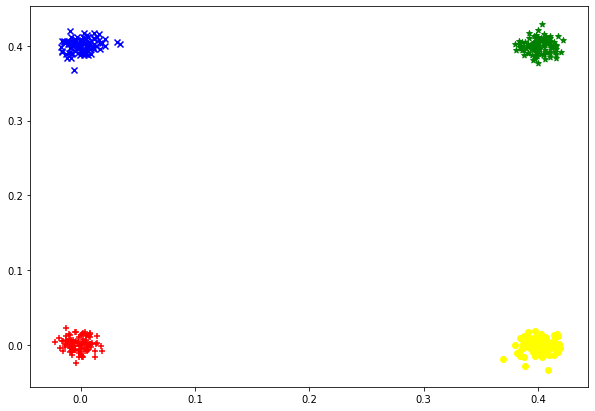

In [ ]:
# write your code here
K = 4

data = []
means = [(0, 0), (0.4, 0.4), (0, 0.4), (0.4, 0)]
color_style = [('red', '+'), ('green', '*'), ('blue', 'x'), ('yellow', 'o')]

plt.figure(figsize=(10, 7))

for i in range(K):
    d = np.random.multivariate_normal(mean=means[i], cov=np.identity(2)*0.0001, size=100)
    plt.scatter(d[:, 0], d[:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])
    data.append(d)

Mean Vectors: [[-0.0048629  -0.00585351]
 [ 0.00860005  0.00047106]
 [ 0.00552484 -0.0079136 ]
 [-0.00989071  0.00838088]]


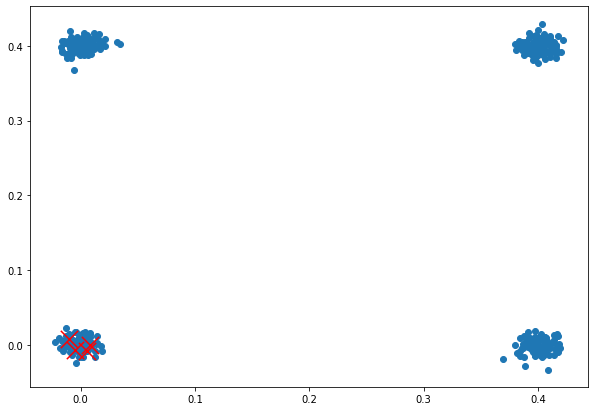

In [ ]:
data_points = np.concatenate(data, axis=0)


plt.figure(figsize=(10, 7))

mean_vectors = data_points[:K, :]

print("Mean Vectors:", mean_vectors)

plt.scatter(data_points[:, 0], data_points[:, 1])
plt.scatter(mean_vectors[:, 0], mean_vectors[:, 1], color='red', marker='x', s=300)

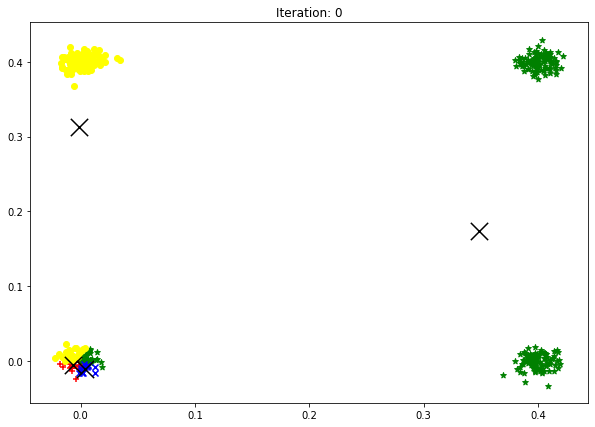

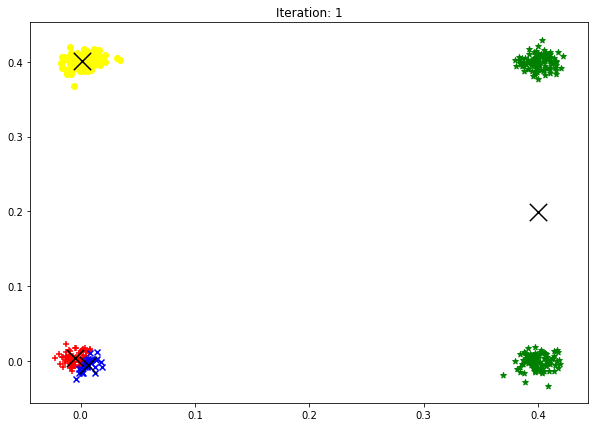

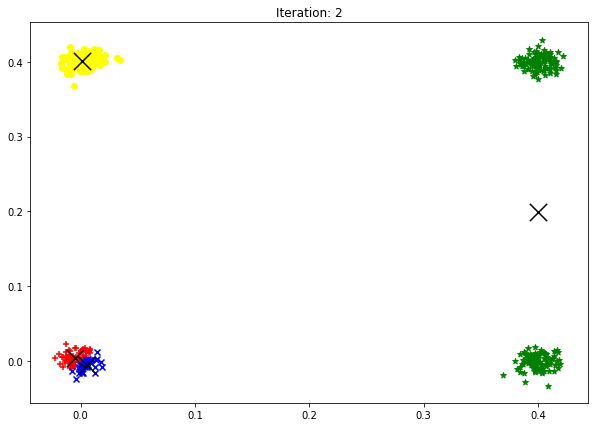

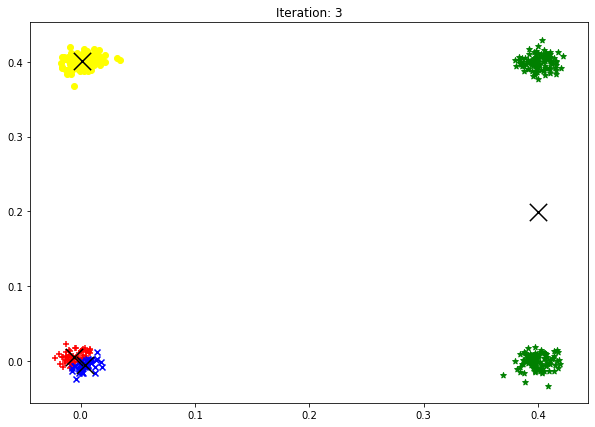

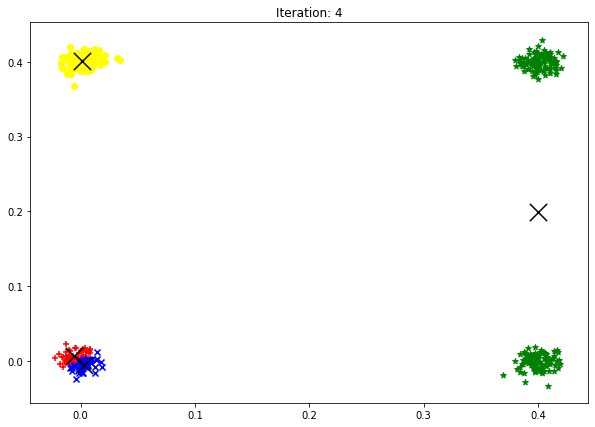

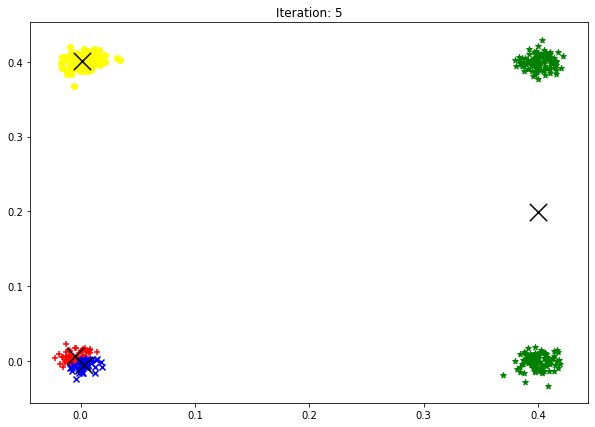

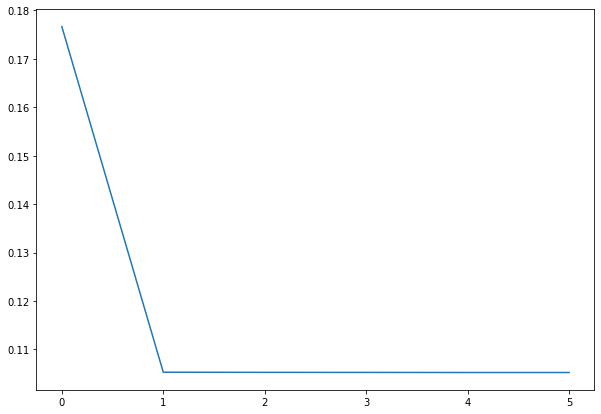

In [ ]:
tol = 1e-5

delta = float('inf')
prev_error = float('inf')

errors = []
iter = 0

while delta>tol:
    assigned = [[] for i in range(K)]
    for i in range(data_points.shape[0]):
        min_index = np.argmin(np.linalg.norm(data_points[i] - mean_vectors, axis=1))
        assigned[min_index].append(i)
        
    assigned_clusters = []
    for i in range(K): assigned_clusters.append(data_points[assigned[i]])

    mean_vectors = np.array([cluster.mean(axis=0) for cluster in assigned_clusters])

    plt.figure(figsize=(10, 7))

    for i in range(K):
        plt.scatter(assigned_clusters[i][:, 0], assigned_clusters[i][:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])

    plt.scatter(mean_vectors[:, 0], mean_vectors[:, 1], color='black', marker='x', s=300)
    plt.title(f'Iteration: {iter}')
    
    sum_error = 0

    for i in range(K): sum_error += np.sum(np.linalg.norm(assigned_clusters[i]-mean_vectors[i], axis=1))

    sum_error
    delta = abs(prev_error - sum_error/data_points.shape[0])
    prev_error = sum_error/data_points.shape[0]

    prev_error
    errors.append(prev_error)
    iter+=1

plt.figure(figsize=(10, 7))
plt.plot(range(len(errors)), errors)

In [ ]:
from sklearn.metrics.cluster import homogeneity_score, silhouette_score

# Homogeneity Score
labels_true = []
labels_predicted = []

for i in range(K):
    for j in range(len(data[i])):
        labels_true.append(i)
        index = np.argmin(np.linalg.norm(data[i][j] - mean_vectors, axis=1))
        labels_predicted.append(index)

h_score = homogeneity_score(labels_true, labels_predicted)

print(f'Homogeneity score for the classification is: {h_score}')

# Silhouette coefficient
all_points = np.concatenate(assigned_clusters, axis=0)
N = len(all_points)

pairwise = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        pairwise[i][j] = np.linalg.norm(np.subtract(all_points[i], all_points[j]))

labels=[]
for id, cluster in enumerate(assigned_clusters):
    labels += [id for i in range(len(cluster))]

sc_score = silhouette_score(pairwise, labels)
print(f'Silhouette coefficient for the classification is: {sc_score}')

Homogeneity score for the classification is: 0.7500000000000004
Silhouette coefficient for the classification is: 0.5420496423979632


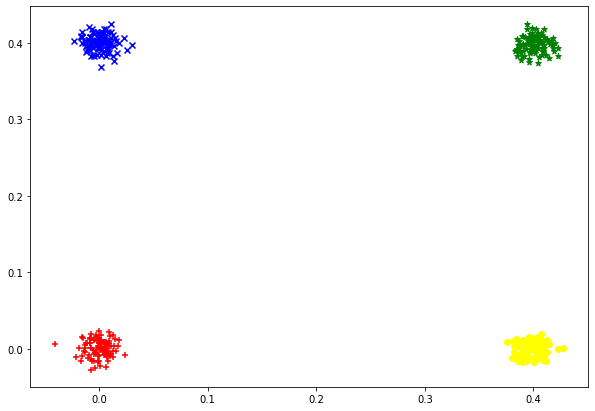

In [ ]:
# write your code here
K = 4

data_sep = []
means = [(0, 0), (0.4, 0.4), (0, 0.4), (0.4, 0)]
color_style = [('red', '+'), ('green', '*'), ('blue', 'x'), ('yellow', 'o')]

plt.figure(figsize=(10, 7))

for i in range(K):
    d = np.random.multivariate_normal(mean=means[i], cov=np.identity(2)*0.0001, size=100)
    plt.scatter(d[:, 0], d[:, 1], color=color_style[i%4][0], marker=color_style[i%4][1])
    data_sep.append(d)

data = np.concatenate(data_sep, axis=0)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_20600\3052499598.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
C:\Users\Shashank\AppData\Local\Temp\ipykernel_20600\3052499598.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


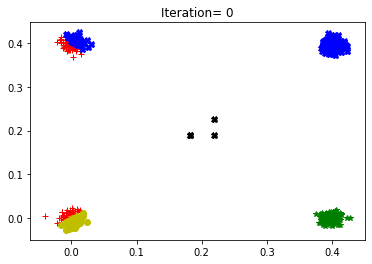

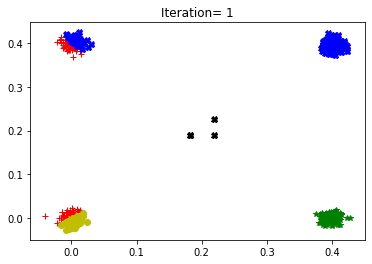

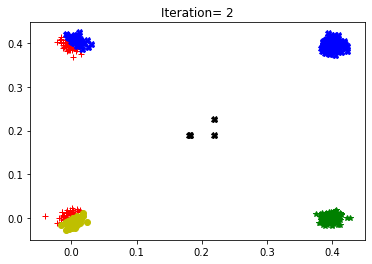

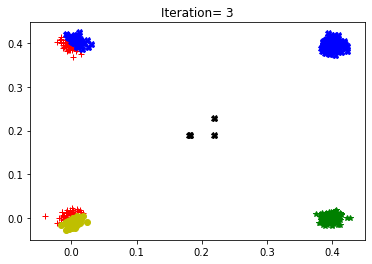

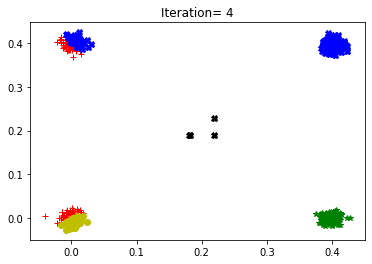

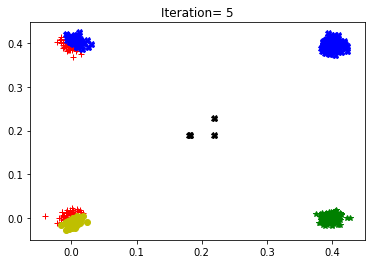

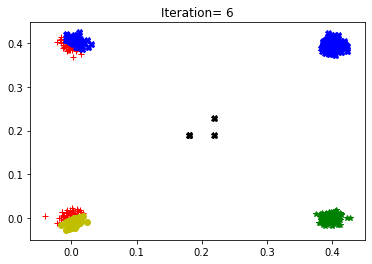

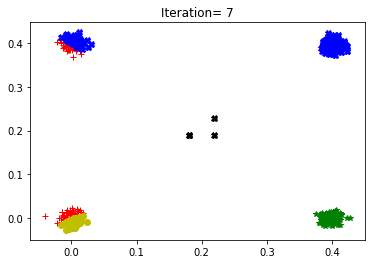

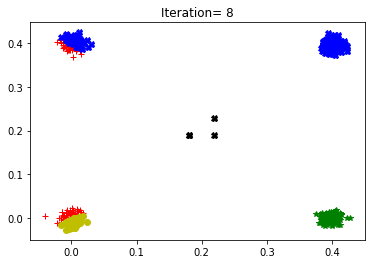

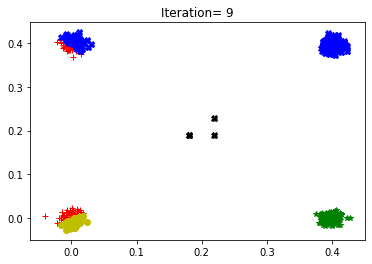

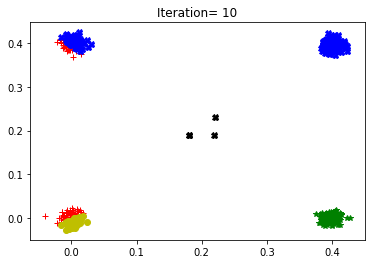

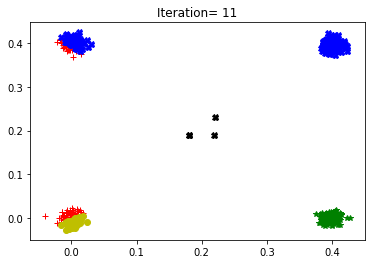

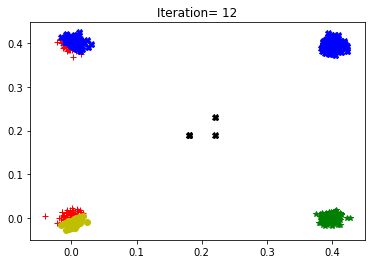

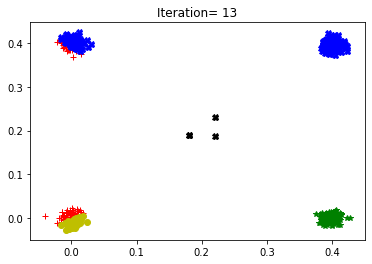

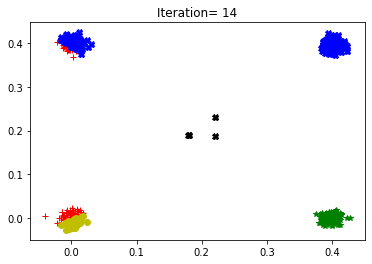

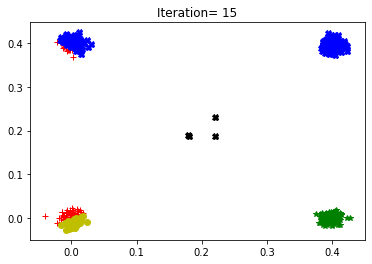

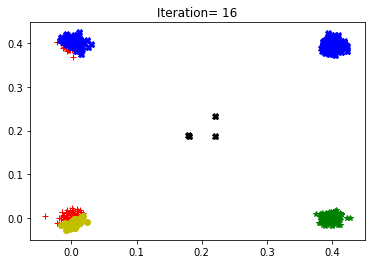

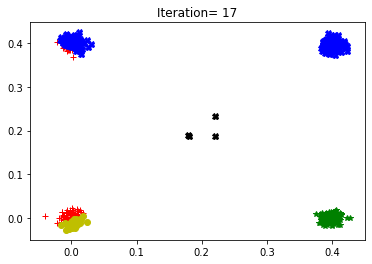

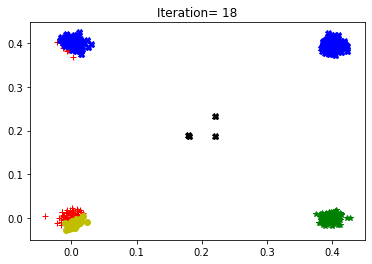

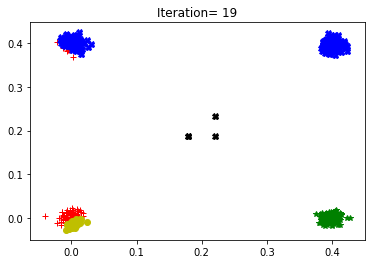

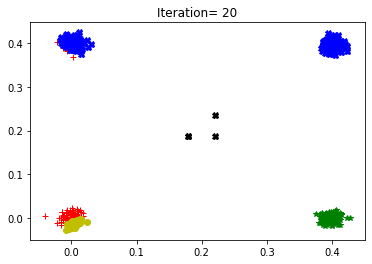

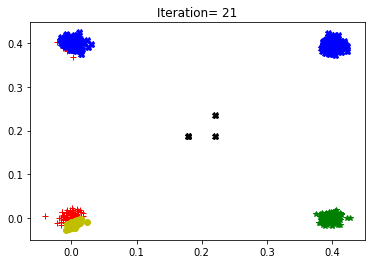

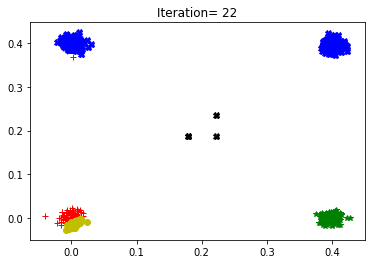

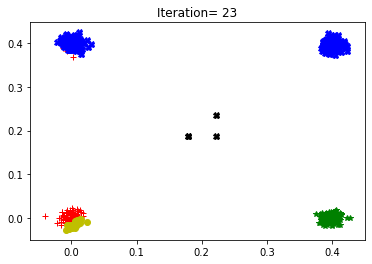

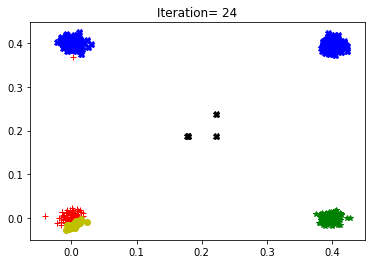

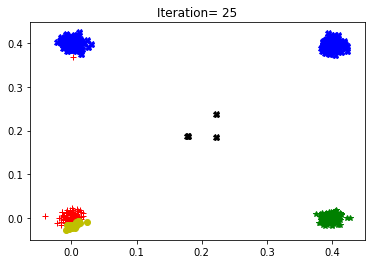

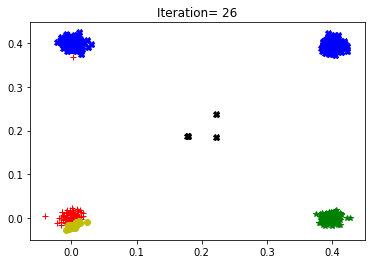

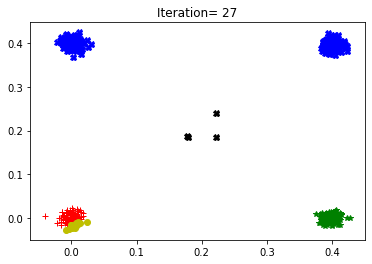

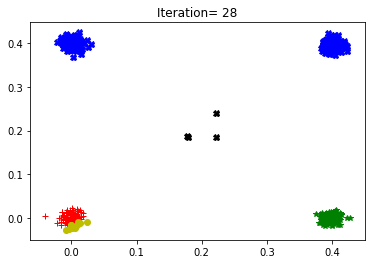

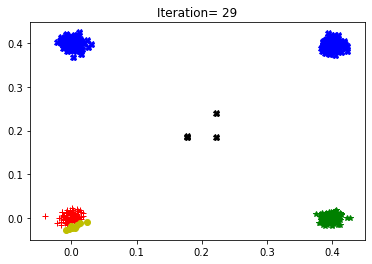

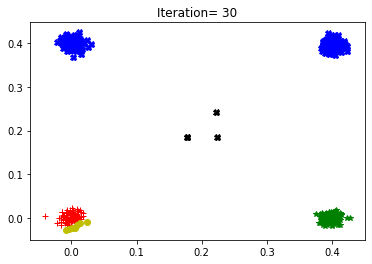

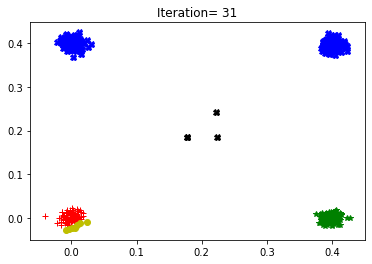

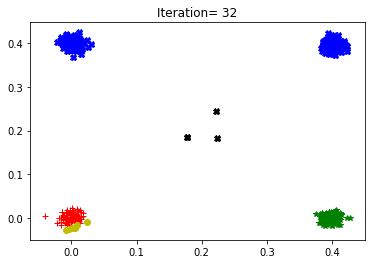

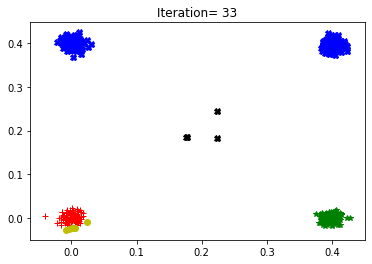

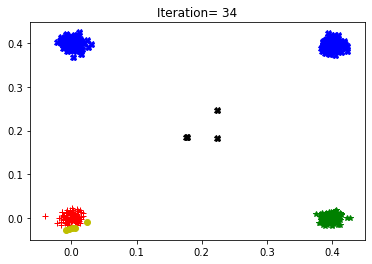

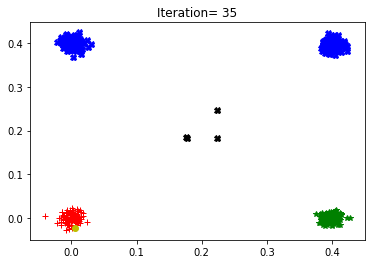

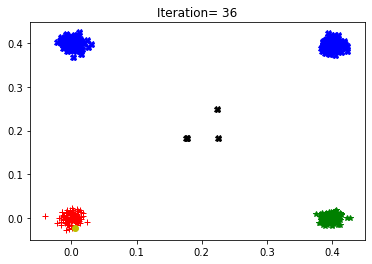

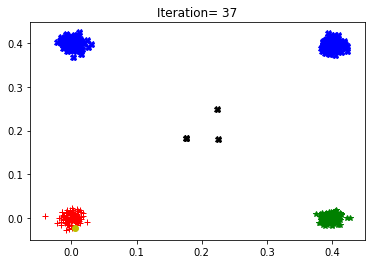

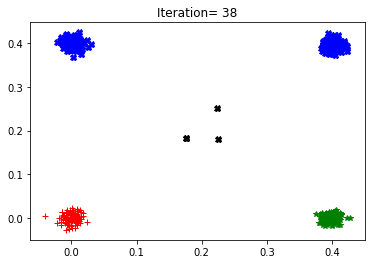

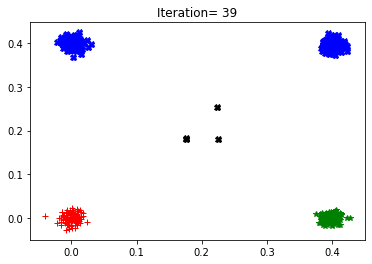

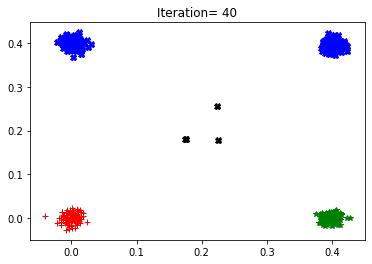

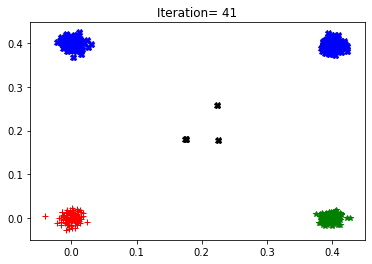

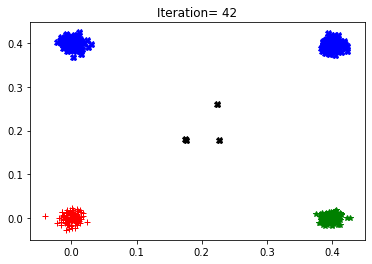

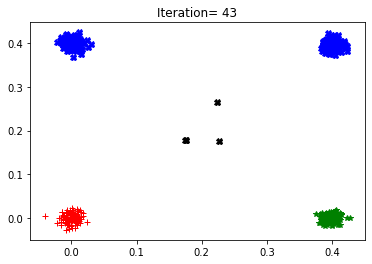

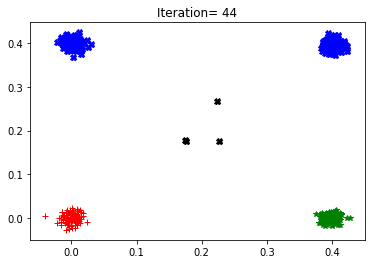

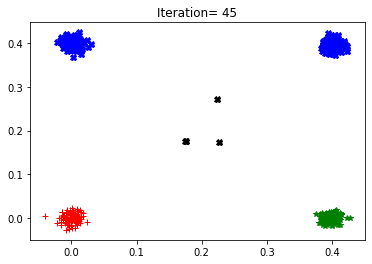

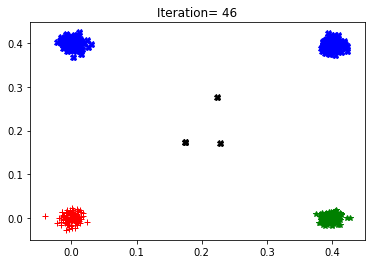

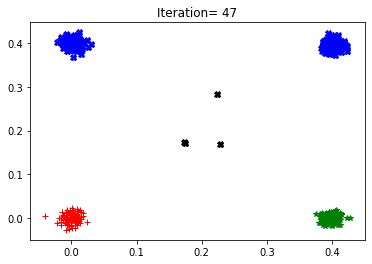

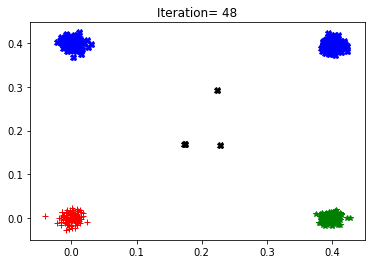

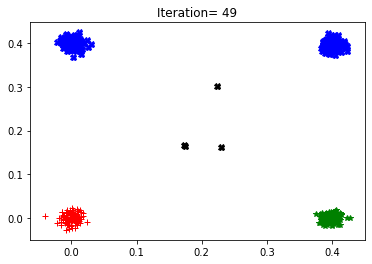

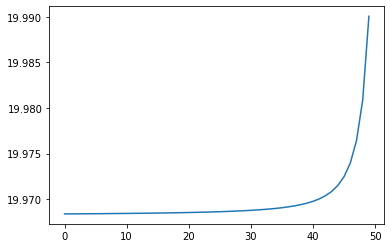

In [ ]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  
  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0]
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

In [ ]:
# write your code here
from sklearn.metrics.cluster import homogeneity_score, silhouette_score

# Homogeneity Score
labels_true = []
labels_predicted = []
mean_vectors = Cents

for i in range(K):
    for j in range(len(data_sep[i])):
        labels_true.append(i)
        index = np.argmin(np.linalg.norm(data_sep[i][j] - mean_vectors, axis=1))
        labels_predicted.append(index)

h_score = homogeneity_score(labels_true, labels_predicted)

print(f'Homogeneity score for the classification is: {h_score}')

# Silhouette coefficient
all_points = data
N = len(all_points)

pairwise = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        pairwise[i][j] = np.linalg.norm(np.subtract(all_points[i], all_points[j]))

labels=[]
for id, cluster in enumerate(assigned_clusters):
    labels += [id for i in range(len(cluster))]

sc_score = silhouette_score(pairwise, labels)
print(f'Silhouette coefficient for the classification is: {sc_score}')

Homogeneity score for the classification is: 0.7500000000000004
Silhouette coefficient for the classification is: 0.9583594358708584


# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [ ]:
import pandas as pd

data = pd.read_csv('Iris.csv')

data[['target']] = data[['species']].apply(lambda col:pd.Categorical(col).codes)

x = np.asarray(data[['sepal_length','sepal_width','petal_length','petal_width']].values.tolist())
y = (data[['species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])

print(x.shape)
print(target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0.5, 0, 'Petal Width')

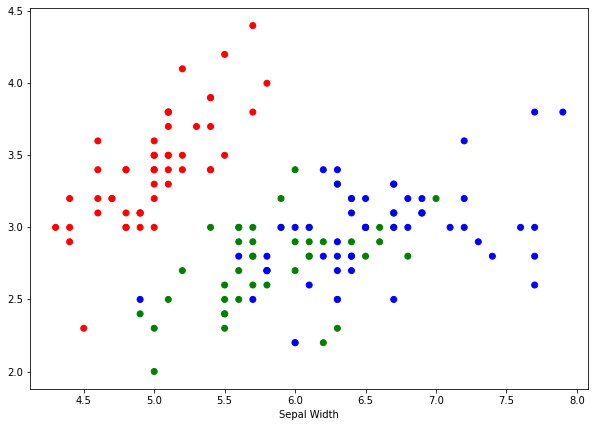

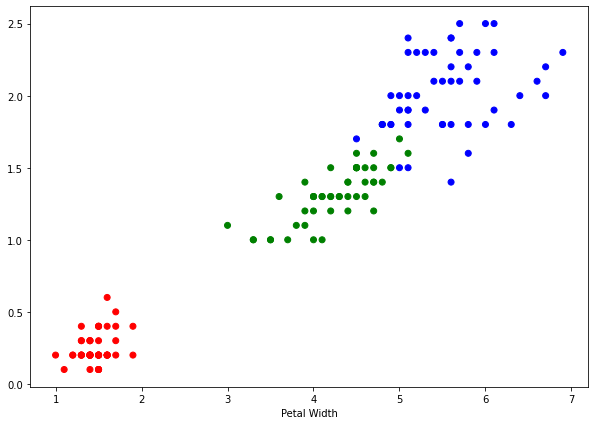

In [ ]:
colors = np.array(['red', 'green', 'blue'])

plt.figure(figsize=(10, 7))

plt.scatter(x[:, 0], x[:, 1], c=colors[data['target']])
plt.xlabel("Sepal Length")
plt.xlabel("Sepal Width")


plt.figure(figsize=(10, 7))

plt.scatter(x[:, 2], x[:, 3], c=colors[data['target']])
plt.xlabel("Petal Length")
plt.xlabel("Petal Width")

In [ ]:
mean_vectors = x[:K, :]

print("Mean Vectors:", mean_vectors)


tol = 1e-5
K = 3
delta = float('inf')
prev_error = float('inf')

errors = []
iter = 0


while delta>tol:
    assigned = [[] for i in range(K)]
    for i in range(x.shape[0]):
        min_index = np.argmin(np.linalg.norm(x[i] - mean_vectors, axis=1))
        assigned[min_index].append(i)
        
    assigned_clusters = []
    for i in range(K): assigned_clusters.append(x[assigned[i]])

    mean_vectors = np.array([cluster.mean(axis=0) for cluster in assigned_clusters])
    sum_error = 0

    for i in range(K): sum_error += np.sum(np.linalg.norm(assigned_clusters[i]-mean_vectors[i], axis=1))

    sum_error
    delta = abs(prev_error - sum_error/x.shape[0])
    prev_error = sum_error/x.shape[0]

    prev_error
    errors.append(prev_error)
    iter+=1
    
print("Final Mean Vector: ", mean_vectors)

Mean Vectors: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Final Mean Vector:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


In [ ]:
from sklearn.metrics.cluster import silhouette_score

# Homogeneity Score
labels_true = target
labels_predicted = []

# Silhouette coefficient
all_points = np.concatenate(assigned_clusters, axis=0)
N = len(all_points)

pairwise = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    for j in range(N):
        pairwise[i][j] = np.linalg.norm(np.subtract(all_points[i], all_points[j]))

labels=[]
for id, cluster in enumerate(assigned_clusters):
    labels += [id for i in range(len(cluster))]

sc_score = silhouette_score(pairwise, labels)
print(f'Silhouette coefficient for the classification is: {sc_score}')

Silhouette coefficient for the classification is: 0.6167390883488784


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=w,n_init=100,max_iter=100,verbose=1)
kmeans.fit(x)

Initialization complete
Iteration 0, inertia 91.14.
Iteration 1, inertia 83.34831944444446.
Iteration 2, inertia 82.34796145640075.
Iteration 3, inertia 81.41746489357332.
Iteration 4, inertia 80.14882662005542.
Iteration 5, inertia 79.66525726935402.
Iteration 6, inertia 79.0868989564323.
Iteration 7, inertia 78.9450658259773.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 123.83999999999996.
Iteration 1, inertia 82.9589329256554.
Iteration 2, inertia 81.8500876628782.
Iteration 3, inertia 80.895776.
Iteration 4, inertia 79.96297983461304.
Iteration 5, inertia 79.43376414532675.
Iteration 6, inertia 79.01070972222222.
Iteration 7, inertia 78.9450658259773.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 131.64999999999998.
Iteration 1, inertia 96.38429279435564.
Iteration 2, inertia 86.3833857399709.
Iteration 3, inertia 79.95338439527467.
Iteration 4, inertia 79.2865426397778.
Iteration 5, inertia 

KMeans(max_iter=100, n_clusters=3, n_init=100, verbose=1)

In [ ]:
from sklearn import metrics

pred=kmeans.predict(x)
print('Homogeneity Score: ',metrics.homogeneity_score(pred,target))

import sklearn.metrics as sm

sm.confusion_matrix(pred, target)

Homogeneity Score:  0.7649861514489815


array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

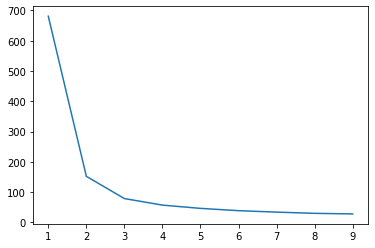

In [ ]:
dist = []
K = range(1,10)
for k in K:
  k_model = KMeans(n_clusters=k)
  k_model.fit(x)
  dist.append(k_model.inertia_)
plt.plot(K, dist)

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [ ]:
# write your code here
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3, init_params='kmeans',covariance_type='diag')
gmm.fit(x)
gmm.get_params(deep=True)
print("Means: ", gmm.means_)
print("Variance", gmm.covariances_)
print("Weights: ", gmm.weights_)

from sklearn import metrics

pred=gmm.predict(x)
print('Homogeneity Score=',metrics.homogeneity_score(pred,target))

import sklearn.metrics as sm
sm.confusion_matrix(pred, target)

Means:  [[6.8060823  3.07023103 5.71889409 2.10305305]
 [5.006      3.418      1.464      0.244     ]
 [5.92570673 2.74947486 4.40355614 1.41204165]]
Variance [[0.28520059 0.08200975 0.25128562 0.06109484]
 [0.121765   0.142277   0.029505   0.011265  ]
 [0.23145596 0.08738014 0.27563102 0.0688713 ]]
Weights:  [0.25465894 0.33333333 0.41200772]
Homogeneity Score= 0.7859016861703575


array([[ 0,  1, 36],
       [50,  0,  0],
       [ 0, 49, 14]], dtype=int64)